In [1]:
%run ./function.ipynb

In [2]:
PATH = 'D:/Temp/NCTU/crystal/第二階段/new_alert/日數分類_營業日/'
FILE = 'TWN_A11_01_day15_with_aggregated_txn_scenario_txn_type_key_營業日.csv'
df = pd.read_csv(PATH + FILE)
df.columns

Index(['alert_id', 'run_date', 'primary_entity_level_code',
       'primary_entity_number', 'scenario_name', 'TO_SAR', 'Acct_No',
       'Cust_No', 'Cust_Key', 'Cust_Segmentation', 'Cust_Typ_Cd', 'Cust_Id_Id',
       'Cust_Id_Typ_Desc', 'Cust_Id_State_Cd', 'Cust_Dt_Of_Birth',
       'Cust_Sts_Desc', 'Street_Postal_Cd', 'Street_Cntry_Cd',
       'Mailing_Postal_Cd', 'Mailing_Cntry_Cd', 'Residence_Cntry_Cd',
       'Citizenship_Cntry_Cd', 'Org_Cntry_Of_Buz_Cd', 'Empl_No', 'Ocup_Code',
       'job_title_code', 'Lst_Cont_Dt', 'Politically_Exposed_Pers_Ind',
       'Non_Prft_Org_Ind', 'Cust_Since_Dt', 'Lst_Susp_Actv_Rpt_Dt',
       'Extnl_Cust_Ind', 'Negative_News_Ind', 'Prim_Br_No', 'Obu_Ind',
       'Riskclass_Cd', 'risk_score', 'last_risk_assessment_date',
       'change_current_ind', 'change_begin_date', 'change_end_date',
       'Credit_Amt', 'number_of_Credit', 'Debit_Amt', 'number_of_Debit'],
      dtype='object')

In [3]:
df['TO_SAR'] = df['TO_SAR'].replace(np.nan, 0)
df['TO_SAR'] = df['TO_SAR'].replace('F', 1)
df['TO_SAR'] = df['TO_SAR'].replace('NF', 1)

In [4]:
df['TO_SAR'].value_counts()

0    86324
1      446
Name: TO_SAR, dtype: int64

In [5]:
SAR_type = 'TO_SAR'
train_set, test_set = ReadFile(df, SAR_type)

Verify on time series
shape of data: (86770, 39)
total number of TO_SAR: 446
********************************
time interval in train set:2019-03-04~2020-04-29
TO_SAR in train set: 267
TO_SAR/Total in train set 0.005128599143312653
split dataset to train, test...
********************************
time interval in test set:2020-02-19~2020-12-31
TO_SAR in test set: 179
TO_SAR/Total in test set 0.0051571638479933155
********************************
train data shape:  (52061, 38)
test data shape:  (34709, 38)


In [6]:
train_set = train_set.dropna(subset= ['Credit_Amt', 'number_of_Credit', 'Debit_Amt', 'number_of_Debit'])
test_set = test_set.dropna(subset= ['Credit_Amt', 'number_of_Credit', 'Debit_Amt', 'number_of_Debit'])

In [7]:
SAR = train_set[train_set.TO_SAR!= 0]
Non_SAR = train_set[train_set.TO_SAR== 0]

In [98]:
x = np.unique(train_set['Credit_Amt'])
x = np.linspace(x[0], x[-1], 1000)
y = np.unique(train_set['number_of_Credit'])
y = np.linspace(y[0], y[-1], 1000)

x, y = np.meshgrid(x, y)

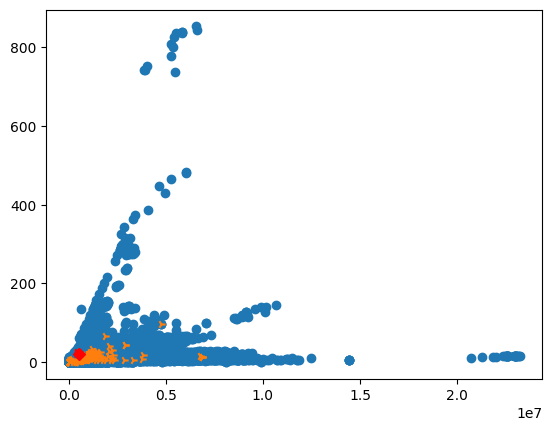

In [69]:
%matplotlib inline
plt.figure()
#plt.scatter(train_set['Credit_Amt'], train_set['number_of_Credit'])
plt.scatter(Non_SAR['Credit_Amt'], Non_SAR['number_of_Credit'], marker= 'o')
plt.scatter(SAR['Credit_Amt'], SAR['number_of_Credit'], marker='4')
plt.plot(537664.0, 20, 'rD')
plt.plot(543000.0, 24, 'r>')

plt.plot()
plt.show()

In [30]:
def Recall(x_thre, y_thre, x_name, y_name, data):
    idx1 = set(data[data[x_name] > x_thre].index)
    idx2 = set(data[data[y_name] > y_thre].index)

    idx = list(idx1 & idx2)
    
    new_sam_1 = data.iloc[idx]
    new_sam_0 = data.drop(index= new_sam_1.index)
    print(f'new_sam_0:{len(new_sam_0)}, new_sam_1:{len(new_sam_1)}')

    if len(set(new_sam_1.index) & set(new_sam_0.index)) != 0:
        raise ValueError('new_sam_1 and new_sam_0 are overlapped!')
    
    TP = new_sam_1[new_sam_1[SAR_type] != 0].shape[0]
    TN = new_sam_0[new_sam_0[SAR_type] == 0].shape[0]
    FP = new_sam_1[new_sam_1[SAR_type] == 0].shape[0]
    FN = new_sam_0[new_sam_0[SAR_type] != 0].shape[0]
    print(f'TP:{TP}, TN:{TN}, FP:{FP}, FN:{FN}')
    return TP / (TP + FN)

In [20]:
x_name= 'Credit_Amt'
y_name= 'number_of_Credit'

In [87]:
a1 = Recall(537664, 4, x_name, y_name, train_set)
a2 = Recall(537664, 7, x_name, y_name, train_set)

print(a1)
print(a2)

new_sam_0:26189, new_sam_1:25871
TP:109, TN:26031, FP:25762, FN:158
new_sam_0:33889, new_sam_1:18171
TP:82, TN:33704, FP:18089, FN:185
0.40823970037453183
0.30711610486891383


##

In [113]:
results = pd.DataFrame({'n':np.arange(0, 2000, 50), 'z': np.arange(0, 2000, 50)})
results.shape

(40, 2)

In [126]:
results.loc[results['n']==x]

,n,z


In [124]:
results.loc[results['n'] == x, 'z']

Series([], Name: z, dtype: int32)

In [122]:
results.iloc[[], :]

IndexError: positional indexers are out-of-bounds

In [118]:
x = set(np.arange(0, 1050, 50))
plt.figure()
plt.plot(x, results.iloc[x, 1])
plt.show()

IndexError: .iloc requires numeric indexers, got {0, 900, 650, 400, 150, 800, 550, 300, 50, 950, 700, 450, 200, 850, 600, 350, 100, 1000, 750, 500, 250}

<Figure size 640x480 with 0 Axes>